In [14]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator

# Define the Bayesian Network structure
model = BayesianNetwork([
    ('Rainy', 'Raincoat'),
    ('Rush_Hour', 'Traffic'),
    ('Rush_Hour', 'Accident'),
    ('Traffic', 'Shortcuts'),
    ('Shortcuts', 'Timing'),
    ('Late_Before', 'Timing'),
    ('Timing', 'Friend_Angry')
])

# Create a DataFrame with data (you should replace this with actual data if available)
data = pd.DataFrame({
    'Rainy': [True, True, False, False],
    'Raincoat': [True, False, True, False],
    'Rush_Hour': [True, False, True, False],
    'Traffic': [True, False, True, False],
    'Accident': [True, False, True, False],
    'Shortcuts': [True, False, True, False],
    'Late_Before': [True, False, True, False],
    'Timing': ['Late', 'On_time', 'Late', 'On_time'],
    'Friend_Angry': [True, False, True, False]
})

# Use Maximum Likelihood Estimation to estimate CPDs
model.fit(data, estimator=MaximumLikelihoodEstimator)

# Display the Conditional Probability Tables
for cpd in model.get_cpds():
    print(f"CPD for {cpd.variable} given {cpd.variables}:")
    print(cpd)
    print("\n")


CPD for Rainy given ['Rainy']:
+--------------+-----+
| Rainy(False) | 0.5 |
+--------------+-----+
| Rainy(True)  | 0.5 |
+--------------+-----+


CPD for Raincoat given ['Raincoat', 'Rainy']:
+-----------------+--------------+-------------+
| Rainy           | Rainy(False) | Rainy(True) |
+-----------------+--------------+-------------+
| Raincoat(False) | 0.5          | 0.5         |
+-----------------+--------------+-------------+
| Raincoat(True)  | 0.5          | 0.5         |
+-----------------+--------------+-------------+


CPD for Rush_Hour given ['Rush_Hour']:
+------------------+-----+
| Rush_Hour(False) | 0.5 |
+------------------+-----+
| Rush_Hour(True)  | 0.5 |
+------------------+-----+


CPD for Traffic given ['Traffic', 'Rush_Hour']:
+----------------+------------------+-----------------+
| Rush_Hour      | Rush_Hour(False) | Rush_Hour(True) |
+----------------+------------------+-----------------+
| Traffic(False) | 1.0              | 0.0             |
+------------

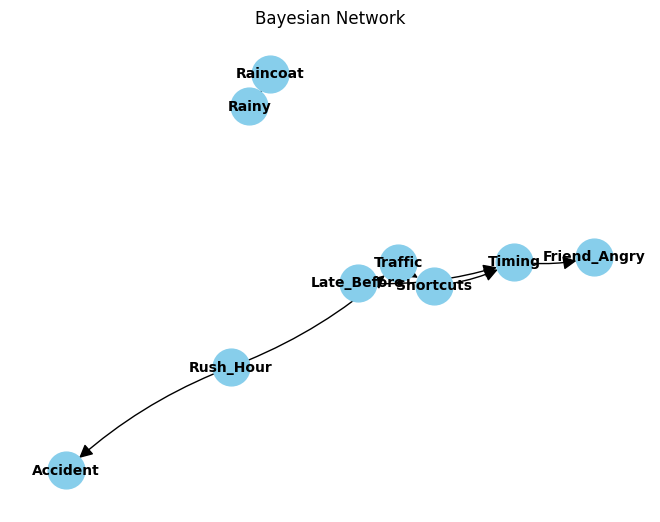

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Convert BayesianModel to networkx graph
graph = nx.DiGraph(model.edges())

# Draw the Bayesian Network
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", arrowsize=20, connectionstyle="arc3,rad=0.1")

plt.title("Bayesian Network")
plt.show()
